In [1]:
import sys
import os 
import numpy as np 
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

import matplotlib.pyplot as plt

In [2]:



IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
TRAIN_PATH = 'kaggle_nucleus_train/'
TEST_PATH = 'kaggle_nucleus_test/'

In [3]:
# Get train and test IDs
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [4]:
# Get and resize train images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask

# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Getting and resizing train images and masks ... 


100%|██████████| 670/670 [01:35<00:00,  7.04it/s]

Getting and resizing test images ... 



100%|██████████| 65/65 [00:00<00:00, 79.66it/s]

Done!


(670, 128, 128, 3)


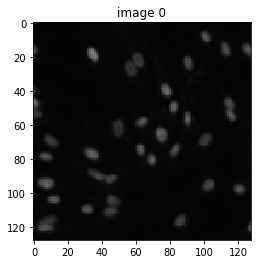

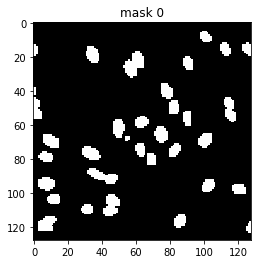

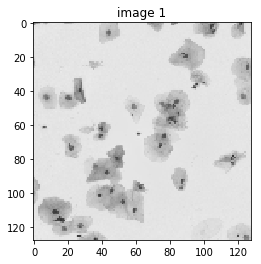

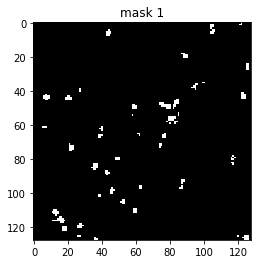

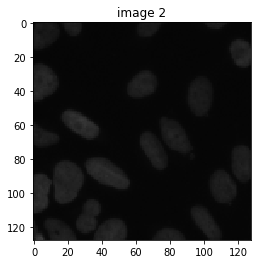

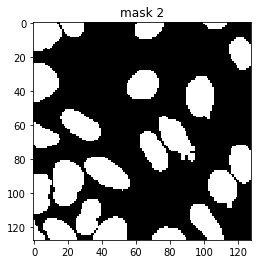

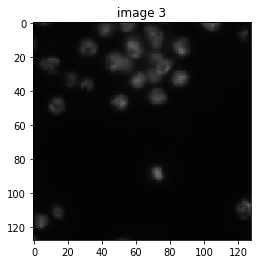

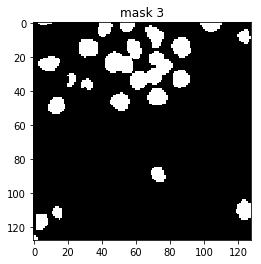

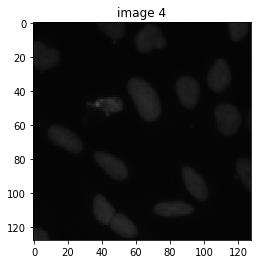

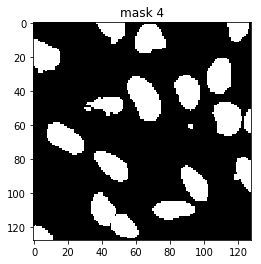

In [5]:
print(X_train.shape)

for i in range(5): 
    plt.imshow(X_train[i,:,:,:])
    plt.title("image "+str(i))
    plt.show()
    plt.imshow(np.squeeze(Y_train[i,:,:,:]),cmap="gray")
    plt.title("mask "+str(i))
    plt.show()


In [18]:
whos


Variable             Type        Data/Info
------------------------------------------
IMG_CHANNELS         int         3
IMG_HEIGHT           int         128
IMG_WIDTH            int         128
TEST_PATH            str         kaggle_nucleus_test/
TRAIN_PATH           str         kaggle_nucleus_train/
X_test               ndarray     65x128x128x3: 3194880 elems, type `uint8`, 3194880 bytes (3.046875 Mb)
X_train              ndarray     670x128x128x3: 32931840 elems, type `uint8`, 32931840 bytes (31.40625 Mb)
Y_train              ndarray     670x128x128x1: 10977280 elems, type `bool`, 10977280 bytes (10.46875 Mb)
chain                type        <class 'itertools.chain'>
concatenate_images   function    <function concatenate_images at 0x7f8c1c068400>
id_                  str         505bc0a3928d8aef5ce441c5a<...>cdc15cc3a52b88030acb50f81
img                  ndarray     128x128x3: 49152 elems, type `float64`, 393216 bytes (384.0 kb)
imread               function    <function imread at 

In [4]:
import sys

new_size = 1024
def training(model, inputs, targets,val,val_target, epochs):
    model.train()
    
    
    
    for epoch in range(epochs): 
        num_batches = 0
        avg_loss = 0
        for (img,lbl) in zip(inputs, targets): 
            
            
            
            img = np.expand_dims(img, axis=0)
            lbl = np.expand_dims(lbl, axis=0)

            x = Variable(torch.FloatTensor(img))

            target = Variable(torch.FloatTensor(lbl))
            
            if GPU: 
                x = x.cuda()
                target = target.cuda()

                
            optimizer.zero_grad()
            output = model(x)
        
            #print(torch.min(output))
            #print(torch.min(target))

            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            avg_loss += loss.data[0]
            #print("loss = ",loss.data[0])
            num_batches += 1
  

        avg_loss /= num_batches
        print('epoch: ' + str(epoch) + ', train loss: ' + str(avg_loss))
        
        
        i = np.random.randint(0,val.shape[0])
        # do one prediction 
        #val_img = transform.resize(np.squeeze(val[i]), (new_size,new_size))
        val_img = val[i]
        val_img = np.expand_dims(val_img, axis=0)
        val_img = Variable(torch.FloatTensor(val_img))
        if GPU: 
            val_img = val_img.cuda()
        prediction = model(val_img)
        
        prediction = prediction.data.cpu().numpy()
        prediction = prediction.squeeze()
        
        plt.figure()
        plt.imshow(np.squeeze(val_target[i]), cmap="gray")
        plt.colorbar()
        
        
        plt.figure()
        plt.imshow(prediction, cmap="gray")
        plt.colorbar()
        plt.show()
        
        
 


In [7]:
X_train = np.moveaxis(X_train, 3, 1)
print(X_train.shape)
Y_train = np.moveaxis(Y_train, 3, 1)
print(Y_train.shape)

(670, 3, 128, 128)
(670, 1, 128, 128)


In [ ]:
np.save('filename.npy',X_train)

In [5]:
import torch
X_train = np.load('X_train.npy')
X_train = (X_train/127)-1
Y_train = np.load('Y_train.npy').astype(np.uint8)



TypeError: Invalid dimensions for image data

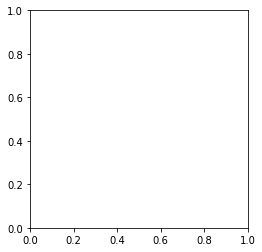

In [14]:
plt.imshow(Y_train[0,:,:,:])

GPU is enabled 
epoch: 0, train loss: 0.14722042631135504


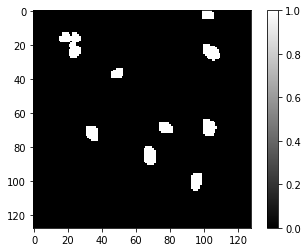

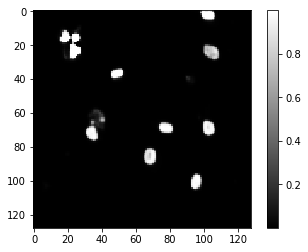

epoch: 1, train loss: 0.09431546740372901


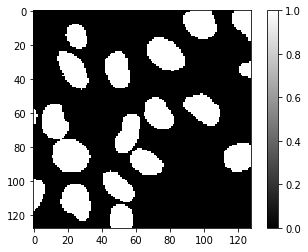

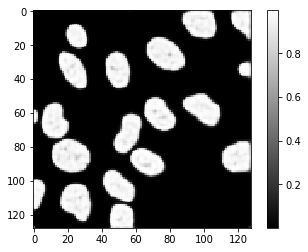

epoch: 2, train loss: 0.08431468596890458


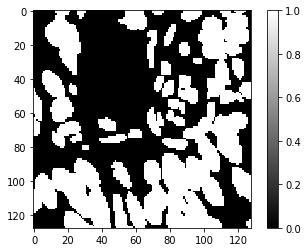

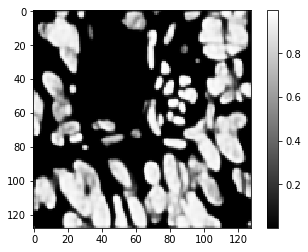

epoch: 3, train loss: 0.08126054310427507


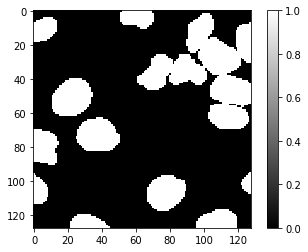

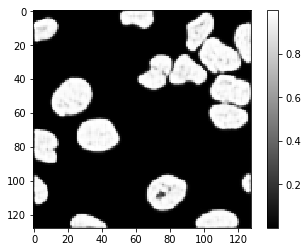

epoch: 4, train loss: 0.07888945449984619


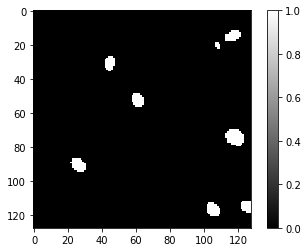

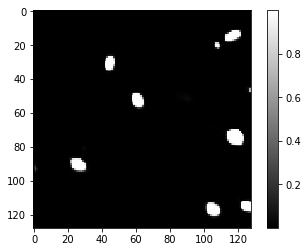

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
from skimage import io, transform
from torchvision import transforms, utils

import numpy as np
import os

from matplotlib import pyplot as plt

from models import * 

%matplotlib inline  

# Prep GPU
GPU = torch.cuda.is_available()
print("GPU is {}enabled ".format(['not ', ''][GPU]))


un = unet(3,1)

if GPU: 
    un = un.cuda()

optimizer = torch.optim.Adam(un.parameters(), lr=0.01)
criterion = nn.BCELoss()

training(un,X_train, Y_train, X_train, Y_train, 100)


#training(un,mito_train_imgs, mito_train_lbls, mito_val_imgs, mito_val_lbls, 1000)

In [10]:
print(np.amax(Y_train))

True


In [22]:
print(torch.cuda.is_available())

True
